In [1]:
import numpy as np
import pandas as pd

import datetime

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

df_fullcleaned = pd.read_csv(r'C:\Users\Admin\Desktop\E_commerce_proj\data\output\data_full_cleaned.csv')

# 1. L·ªçc c√°c c·ªôt ƒë·ªÉ s·ª≠ d·ª•ng cho kmean
# M·ª•c ƒë√≠ch: Ph√¢n kh√∫c h√†nh vi mua h√†ng
D√πng thu·∫≠t to√°n KMeans ƒë·ªÉ ph√¢n c·ª•m kh√°ch h√†ng d·ª±a tr√™n ƒë·∫∑c tr∆∞ng RFM:

Recency (R): th·ªùi gian k·ªÉ t·ª´ l·∫ßn mua h√†ng g·∫ßn nh·∫•t

Frequency (F): t·∫ßn su·∫•t mua h√†ng

Monetary (M): t·ªïng ti·ªÅn ƒë√£ chi ti√™u




# PH·∫¶N 1: T√≠nh To√°n RFM

In [2]:
df = df_fullcleaned.copy()
# t·∫°o b·∫£n sao d·ªØ li·ªáu g·ªëc


In [3]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Chuy·ªÉn ƒë·ªïi c·ªôt 'Date' th√†nh ki·ªÉu datetime

In [4]:
from datetime import timedelta
snapshot_date = df['Date'].max() + timedelta(days=1)
df['Recency'] = (snapshot_date - df['Date']).dt.days
#T√≠nh Recency b·∫±ng s·ªë ng√†y k·ªÉ t·ª´ l·∫ßn mua cu·ªëi c√πng ƒë·∫øn "snapshot_date" (ng√†y m·ªõi nh·∫•t + 1 ng√†y)

In [5]:
freq_cols = ['NumGiftPurchases', ..., 'NumStorePurchases']
freq_cols = [c for c in freq_cols if c in df.columns]
df['Frequency'] = df[freq_cols].sum(axis=1)
#T√≠nh Frequency b·∫±ng t·ªïng s·ªë l·∫ßn mua h√†ng t·ª´ nhi·ªÅu lo·∫°i h√¨nh (qu√† t·∫∑ng, gi·∫£m gi√°, mua t·∫°i c·ª≠a h√†ng...)

In [6]:
df['Monetary'] = df['AmountSpent']
# G√°n chi ti√™u Monetary t·ª´ c·ªôt AmountSpent.

# PH·∫¶N 2: T·∫†O MA TR·∫¨N ƒê·∫∂C TR∆ØNG V√Ä CHU·∫®N H√ìA


In [7]:
rfm_features = ['Recency', 'Frequency', 'Monetary']
X = df[rfm_features].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

#Tr√≠ch c√°c ƒë·∫∑c tr∆∞ng RFM th√†nh ma tr·∫≠n X,
# sau ƒë√≥ chu·∫©n h√≥a b·∫±ng StandardScaler ƒë·ªÉ d·ªØ li·ªáu c√≥ mean = 0, std = 1 gi√∫p KMeans ho·∫°t ƒë·ªông hi·ªáu qu·∫£ h∆°n.

# PH·∫¶N 3: T√¨m s·ªë c·ª•m t·ªëi ∆∞u (k)

In [8]:
ks = range(2, 11)
sse, sil, ch, db = [], [], [], []

# Kh·ªüi t·∫°o kho·∫£ng t·ª´ 2 ƒë·∫øn 10 c·ª•m v√† c√°c list l∆∞u ch·ªâ s·ªë ƒë√°nh gi√°:

# SSE: t·ªïng b√¨nh ph∆∞∆°ng kho·∫£ng c√°ch n·ªôi c·ª•m (Elbow method)

# Silhouette: m·ª©c ƒë·ªô t√°ch bi·ªát c√°c c·ª•m

# Calinski-Harabasz (CH): ƒë√°nh gi√° ƒë·ªô ƒë·∫∑c v√† ph√¢n t√°ch c·ª•m

# Davies-Bouldin (DB): gi√° tr·ªã th·∫•p h∆°n l√† t·ªët

In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sse.append(km.inertia_)
    sil.append(silhouette_score(X_scaled, labels))
    ch.append(calinski_harabasz_score(X_scaled, labels))
    db.append(davies_bouldin_score(X_scaled, labels))

#Ch·∫°y KMeans cho t·ª´ng k, l∆∞u l·∫°i c√°c ch·ªâ s·ªë ƒë√°nh gi√° sau khi g√°n nh√£n cho d·ªØ li·ªáu.

# PH·∫¶N 4: V·∫Ω bi·ªÉu ƒë·ªì ƒë√°nh gi√° ƒë·ªÉ ch·ªçn k

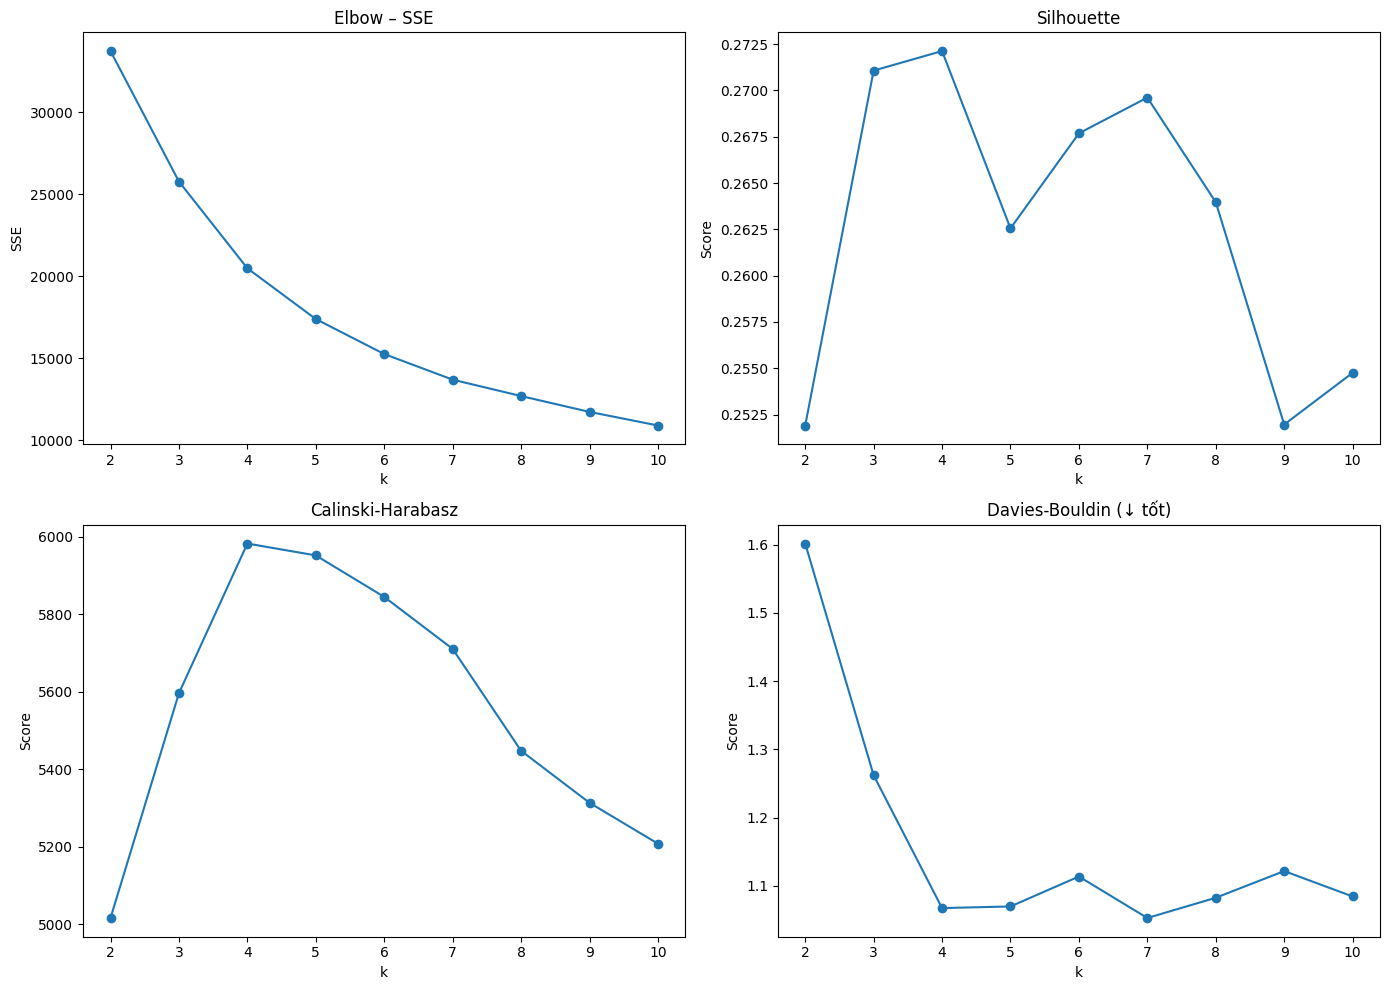

In [10]:
ig, axs = plt.subplots(2, 2, figsize=(14, 10))
# Elbow
axs[0,0].plot(ks, sse, marker='o'); axs[0,0].set_title('Elbow ‚Äì SSE'); axs[0,0].set_xlabel('k'); axs[0,0].set_ylabel('SSE')
# Silhouette
axs[0,1].plot(ks, sil, marker='o'); axs[0,1].set_title('Silhouette'); axs[0,1].set_xlabel('k'); axs[0,1].set_ylabel('Score')
# Calinski‚ÄìHarabasz
axs[1,0].plot(ks, ch, marker='o'); axs[1,0].set_title('Calinski-Harabasz'); axs[1,0].set_xlabel('k'); axs[1,0].set_ylabel('Score')
# Davies-Bouldin
axs[1,1].plot(ks, db, marker='o'); axs[1,1].set_title('Davies-Bouldin (‚Üì t·ªët)'); axs[1,1].set_xlabel('k'); axs[1,1].set_ylabel('Score')
plt.tight_layout(); plt.show()

# Ph·∫ßn 5: Ch·ªçn k t·ªëi ∆∞u


In [11]:
k_opt = 4
# Ch·ªçn k=4 d·ª±a tr√™n c√°c ch·ªâ s·ªë ƒë√°nh gi√°
# th∆∞·ªùng l√† ƒëi·ªÉm g√£y Elbow, Silhouette cao nh·∫•t,
# CH cao & DB th·∫•p

In [12]:
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


# Ph·∫ßn 6: Hu·∫©n luy·ªán v·ªõi k t·ªëi ∆∞u v√† g√°n nh√£n


## NH√ÉN D√ÅN CHO C√ÅC CLUSTER
Segment:	√ù nghƒ©a h√†nh vi th·ª±c t·∫ø,	Chi·∫øn l∆∞·ª£c, g·ª£i √Ω

üèÜ Champions	- Kh√°ch h√†ng c√≥ Recency th·∫•p, Frequency cao, Monetary cao ‚Üí H·ªç l√† kh√°ch h√†ng t·ªët nh·∫•t!	- Gi·ªØ ch√¢n b·∫±ng ∆∞u ƒë√£i VIP, chƒÉm s√≥c c√° nh√¢n, ∆∞u ti√™n ph·∫£n h·ªìi nhanh

üíö Loyal	- Mua h√†ng th∆∞·ªùng xuy√™n, th∆∞·ªùng l√† Frequency cao, Monetary trung b√¨nh	- TƒÉng ƒë·ªô trung th√†nh: t√≠ch ƒëi·ªÉm, qu√† t·∫∑ng, khuy·∫øn m√£i ƒë·ªôc quy·ªÅn

‚ö†Ô∏è At-Risk	- Recency cao, kh√¥ng quay l·∫°i g·∫ßn ƒë√¢y, c√≥ th·ªÉ t·ª´ng chi ti√™u cao	- G·ª≠i email t√°i k√≠ch ho·∫°t, khuy·∫øn m√£i "ch√†o quay l·∫°i", kh·∫£o s√°t l√Ω do

üò¥ Sleepers	- Recency cao, Frequency & Monetary th·∫•p ‚Üí g·∫ßn nh∆∞ kh√¥ng c√≤n t∆∞∆°ng t√°c	- C√≥ th·ªÉ lo·∫°i kh·ªèi chi·∫øn d·ªãch ch√≠nh, ho·∫∑c th·ª≠ chi·∫øn d·ªãch g√¢y t√≤ m√≤ nh·∫π

In [ ]:
# ---------------------------------------------------------------
# . G√°n nh√£n h√†nh vi kh√°ch h√†ng (Segment) theo ƒëi·ªÉm RFM
# ---------------------------------------------------------------

# T√≠nh trung b√¨nh RFM theo c·ª•m
grp = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# T√≠nh ƒëi·ªÉm t·ªïng h·ª£p: R th·∫•p t·ªët, F v√† M cao t·ªët
grp['Score'] = (
    grp['Recency'].rank(ascending=True) + 
    grp['Frequency'].rank(ascending=False) +
    grp['Monetary'].rank(ascending=False)
).astype(int)

# S·∫Øp x·∫øp c·ª•m theo ƒëi·ªÉm v√† g√°n nh√£n
grp = grp.sort_values('Score', ascending=False)
default_labels = ['Champions', 'Loyal', 'At-Risk', 'Sleepers']
segment_map = {cluster: default_labels[i] for i, cluster in enumerate(grp.index)}
df['Segment'] = df['Cluster'].map(segment_map)

# ---------------------------------------------------------------
# x. Ki·ªÉm tra k·∫øt qu·∫£
# ---------------------------------------------------------------
print("=== Th·ªëng k√™ c·ª•m kh√°ch h√†ng (theo RFM trung b√¨nh + ƒëi·ªÉm) ===")
print(grp[['Recency', 'Frequency', 'Monetary', 'Score']])


print("\n=== Ph√¢n b·ªë kh√°ch h√†ng theo Segment ===")
print(df['Segment'].value_counts())


=== Th·ªëng k√™ c·ª•m kh√°ch h√†ng (theo RFM trung b√¨nh + ƒëi·ªÉm) ===
          Recency  Frequency      Monetary  Score
Cluster                                          
0        7.231142   7.752039   7091.052611     11
3        2.400504  11.870931   6982.226365      8
1        7.036014  16.945843   7118.603936      6
2        5.380007  11.960609  19665.803701      5

=== Ph√¢n b·ªë kh√°ch h√†ng theo Segment ===
Segment
Loyal        4362
Champions    3924
At-Risk      3693
Sleepers     3021
Name: count, dtype: int64


# Ph·∫ßn 7: Tr·ª±c h√≥a

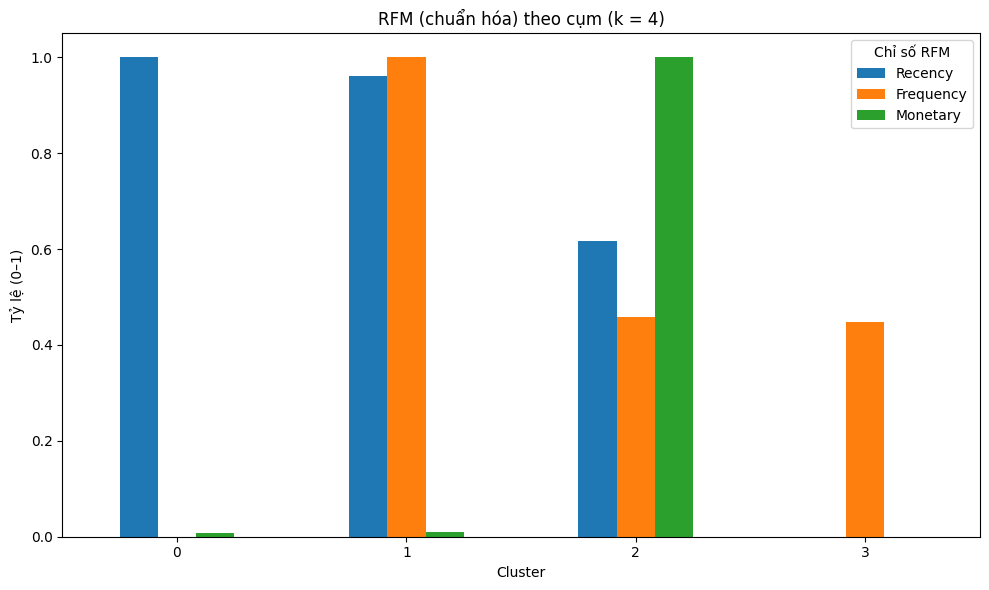

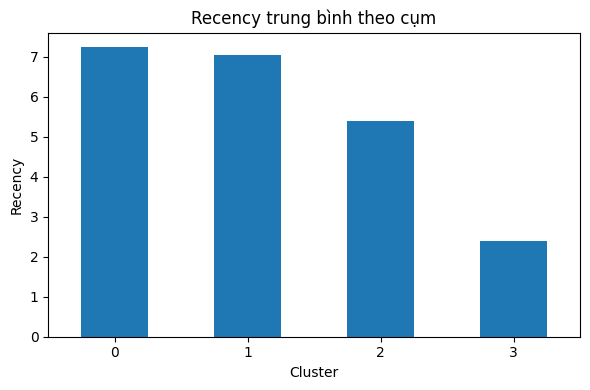

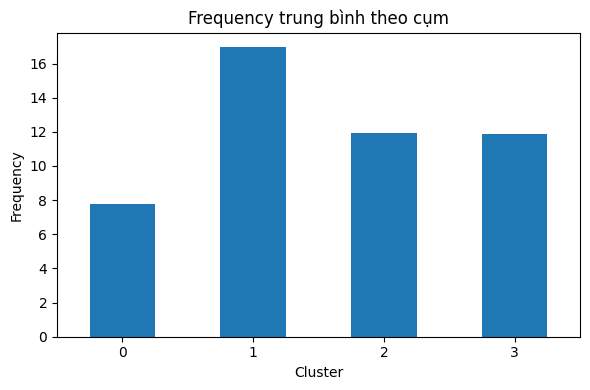

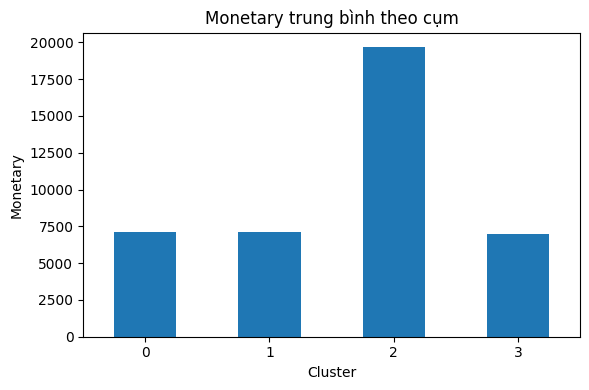

In [19]:
# ---------------------------------------------------------------
# BI·ªÇU ƒê·ªí C·ªòT: RFM TRUNG B√åNH THEO CLUSTER (Ph√π h·ª£p v·ªõi Code 1)
# ---------------------------------------------------------------

# T√≠nh trung b√¨nh RFM theo c·ª•m
rfm_cols = ['Recency', 'Frequency', 'Monetary']
rfm_summary = (
    df.groupby('Cluster')[rfm_cols]
      .mean()
      .round(2)
      .sort_index()
)
rfm_normalized = rfm_summary.copy()
rfm_normalized = (rfm_normalized - rfm_normalized.min()) / (rfm_normalized.max() - rfm_normalized.min())

rfm_normalized.plot(kind='bar', figsize=(10, 6))
plt.title(f'RFM (chu·∫©n h√≥a) theo c·ª•m (k = {k_opt})')
plt.xlabel('Cluster'); plt.ylabel('T·ª∑ l·ªá (0‚Äì1)')
plt.xticks(rotation=0); plt.legend(title='Ch·ªâ s·ªë RFM')
plt.tight_layout(); plt.show()


for col in ['Recency', 'Frequency', 'Monetary']:
    rfm_summary[col].plot(kind='bar', figsize=(6, 4), title=f'{col} trung b√¨nh theo c·ª•m')
    plt.ylabel(col); plt.xlabel('Cluster'); plt.xticks(rotation=0)
    plt.tight_layout(); plt.show()




BI·ªÇU ƒê·ªí PCA

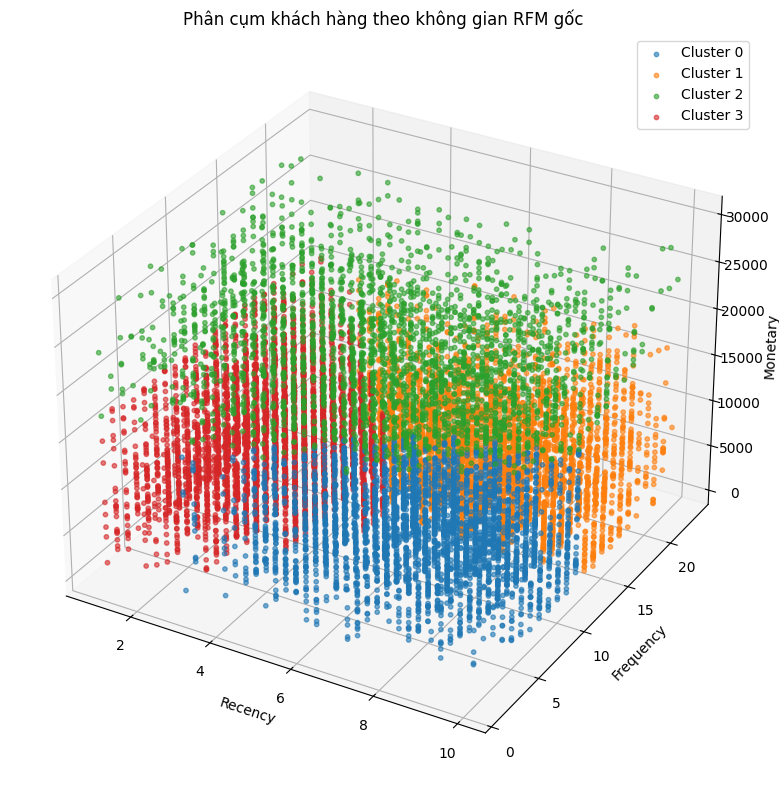

Cluster
3    4362
0    3924
1    3693
2    3021
Name: count, dtype: int64
Segment
Loyal        4362
Champions    3924
At-Risk      3693
Sleepers     3021
Name: count, dtype: int64


In [ ]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

colors = ['tab:blue','tab:orange','tab:green','tab:red']
for cl in sorted(df['Cluster'].unique()):
    sub = df[df['Cluster'] == cl]
    ax.scatter(sub['Recency'], sub['Frequency'], sub['Monetary'],
               c=colors[cl % len(colors)], label=f'Cluster {cl}', s=10, alpha=0.6)

ax.set_xlabel('Recency'); ax.set_ylabel('Frequency'); ax.set_zlabel('Monetary')
ax.set_title("Ph√¢n c·ª•m kh√°ch h√†ng theo kh√¥ng gian RFM g·ªëc")
ax.legend()
plt.tight_layout(); plt.show()


# Th·ªëng k√™ s·ªë l∆∞·ª£ng kh√°ch h√†ng theo c·ª•m
print(df['Cluster'].value_counts())

# N·∫øu ƒë√£ c√≥ nh√£n Segment
print(df['Segment'].value_counts())


Ph√¢n C·ª•m Kh√°ch H√†ng Theo Kh√¥ng Gian RFM G·ªëc

Bi·ªÉu ƒë·ªì d∆∞·ªõi ƒë√¢y minh h·ªça k·∫øt qu·∫£ ph√¢n c·ª•m kh√°ch h√†ng d·ª±a tr√™n ba ƒë·∫∑c tr∆∞ng RFM:

Recency (g·∫ßn ƒë√¢y mua h√†ng)

Frequency (t·∫ßn su·∫•t mua h√†ng)

Monetary (t·ªïng chi ti√™u)


M·ªói ƒëi·ªÉm trong kh√¥ng gian 3D ƒë·∫°i di·ªán cho m·ªôt kh√°ch h√†ng, ƒë∆∞·ª£c t√¥ m√†u theo c·ª•m (cluster) m√† m√¥ h√¨nh KMeans ph√¢n lo·∫°i ƒë∆∞·ª£c:

üü¶ Cluster 0: T·∫≠p trung ·ªü m·ª©c chi ti√™u th·∫•p & √≠t t·∫ßn su·∫•t, c√≥ th·ªÉ l√† nh√≥m kh√°ch h√†ng m·ªõi ho·∫∑c kh√¥ng t√≠ch c·ª±c.

üüß Cluster 1: Chi ti√™u trung b√¨nh, mua th∆∞·ªùng xuy√™n, ti·ªÅm nƒÉng tr·ªü th√†nh kh√°ch h√†ng trung th√†nh.

üü© Cluster 2: C√≥ chi ti√™u cao nh·∫•t v√† mua nhi·ªÅu l·∫ßn, kh·∫£ nƒÉng l√† nh√≥m kh√°ch VIP ho·∫∑c Champions.

üü• Cluster 3: Mua g·∫ßn ƒë√¢y nh∆∞ng t·∫ßn su·∫•t th·∫•p v√† chi ti√™u th·∫•p ‚Äì c√≥ th·ªÉ l√† kh√°ch m·ªõi c·∫ßn nu√¥i d∆∞·ª°ng th√™m.

## Heatmap

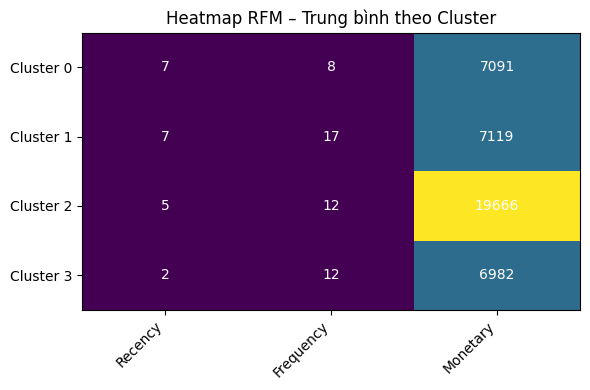

In [ ]:


import matplotlib.pyplot as plt

# T√≠nh trung b√¨nh RFM theo c·ª•m
rfm_cols = ['Recency', 'Frequency', 'Monetary']
rfm_means = (
    df.groupby('Cluster')[rfm_cols]
      .mean()
      .round(2)
      .sort_index()
)

# Chu·∫©n b·ªã d·ªØ li·ªáu cho heatmap
data = rfm_means.values
clusters = rfm_means.index.astype(str)

# V·∫Ω heatmap
fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(data, cmap='viridis', aspect='auto')

# G√°n nh√£n tr·ª•c
ax.set_xticks(range(len(rfm_cols)))
ax.set_xticklabels(rfm_cols, rotation=45, ha='right')
ax.set_yticks(range(len(clusters)))
ax.set_yticklabels([f'Cluster {c}' for c in clusters])

# Ghi gi√° tr·ªã l√™n t·ª´ng √¥
for i in range(len(clusters)):
    for j in range(len(rfm_cols)):
        ax.text(j, i, f"{data[i, j]:.0f}", ha='center', va='center', color='w')

ax.set_title("Heatmap RFM ‚Äì Trung b√¨nh theo Cluster")
fig.tight_layout()
plt.show()


Bi·ªÉu ƒë·ªì d∆∞·ªõi ƒë√¢y minh h·ªça trung b√¨nh gi√° tr·ªã RFM (Recency, Frequency, Monetary) c·ªßa t·ª´ng nh√≥m kh√°ch h√†ng sau khi ph√¢n c·ª•m b·∫±ng thu·∫≠t to√°n KMeans (k=4):

Tr·ª•c d·ªçc l√† c√°c c·ª•m kh√°ch h√†ng (Cluster 0‚Äì3)

Tr·ª•c ngang l√† ba ch·ªâ s·ªë h√†nh vi:

Recency: s·ªë ng√†y k·ªÉ t·ª´ l·∫ßn mua cu·ªëi c√πng (th·∫•p h∆°n l√† t·ªët h∆°n)

Frequency: t·∫ßn su·∫•t mua h√†ng (cao h∆°n l√† t·ªët h∆°n)

Monetary: t·ªïng chi ti√™u (cao h∆°n l√† t·ªët h∆°n)

M√†u s·∫Øc th·ªÉ hi·ªán m·ª©c ƒë·ªô t∆∞∆°ng ƒë·ªëi gi·ªØa c√°c c·ª•m ‚Äì m√†u s√°ng h∆°n th·ªÉ hi·ªán gi√° tr·ªã cao h∆°n.

üìå Di·ªÖn gi·∫£i c·ª•m:
Cluster	Di·ªÖn gi·∫£i t·∫°m th·ªùi

Cluster 0	Recency = 7, Frequency = 8, Monetary = 7,091 ‚Üí Kh√°ch h√†ng ho·∫°t ƒë·ªông v·ª´a ph·∫£i, chi ti√™u trung b√¨nh

Cluster 1	Recency = 7, Frequency = 17, Monetary = 7,119 ‚Üí Kh√°ch h√†ng th∆∞·ªùng xuy√™n mua, nh∆∞ng chi ti√™u kh√¥ng cao

Cluster 2	Recency = 5, Frequency = 12, Monetary = 19,666 ‚Üí Kh√°ch h√†ng c√≥ gi√° tr·ªã cao nh·∫•t, c√≥ th·ªÉ l√† VIP / Champions

Cluster 3	Recency = 2, Frequency = 12, Monetary = 6,982 ‚Üí Kh√°ch h√†ng m·ªõi ho·∫∑c ti·ªÅm nƒÉng, c·∫ßn nu√¥i d∆∞·ª°ng

# Ph·∫ßn 8: L∆∞u c·ª•m kh√°ch h√†ng ra m·ªôt file ƒë·ªÉ d·ªÖ ki·ªÉm tra


In [ ]:
# Xu·∫•t d·ªØ li·ªáu ƒë√£ ph√¢n c·ª•m ra file
df.to_csv('khach_hang_phan_cum.csv', index=False)
print("ƒê√£ l∆∞u file 'khach_hang_phan_cum.csv'")


ƒê√£ l∆∞u file 'khach_hang_phan_cum.csv'


# T·ª´ ƒë√≥ c√≥ th·ªÉ g·ª£i √Ω chi·∫øn l∆∞·ª£c cho doanh nghi·ªáp
G·ª£i √Ω chi·∫øn l∆∞·ª£c ti·∫øp th·ªã cho t·ª´ng c·ª•m kh√°ch h√†ng (D·ª±a tr√™n RFM)
Gi·∫£ s·ª≠ k·∫øt qu·∫£ trung b√¨nh c√°c c·ª•m nh∆∞ sau:

Cluster	Recency ‚Üì	Frequency ‚Üë	Monetary ‚Üë	Nh√≥m m√¥ t·∫£
0	Th·∫•p	Cao	Cao	Kh√°ch h√†ng trung th√†nh
1	Cao	Th·∫•p	Th·∫•p	Kh√°ch h√†ng m·∫•t t√≠ch
2	Trung b√¨nh	Trung b√¨nh	Trung b√¨nh	Kh√°ch h√†ng ti·ªÅm nƒÉng
3	Th·∫•p	Th·∫•p	Cao	M·ªõi mua gi√° tr·ªã cao

üîπ Chi·∫øn l∆∞·ª£c g·ª£i √Ω theo t·ª´ng nh√≥m:
Nh√≥m kh√°ch h√†ng	, ƒë·∫∑c ƒëi·ªÉm ch√≠nh,	Chi·∫øn l∆∞·ª£c ti·∫øp th·ªã
---------------------------------------
üü¢ Cluster 0 ‚Äì Trung th√†nh	Mua th∆∞·ªùng xuy√™n, chi nhi·ªÅu, gh√© g·∫ßn ƒë√¢y	- ∆Øu ƒë√£i th√†nh vi√™n VIP
- Gi·ªØ ch√¢n b·∫±ng t√≠ch ƒëi·ªÉm
- G·ª≠i th∆∞ tri √¢n, ∆∞u ƒë√£i sinh nh·∫≠t

üî¥ Cluster 1 ‚Äì M·∫•t t√≠ch	L√¢u kh√¥ng mua, t·∫ßn su·∫•t th·∫•p, chi √≠t	- G·ª≠i email khuy·∫øn m√£i
- Gi·∫£m gi√° m·∫°nh ƒë·ªÉ t√°i k√≠ch ho·∫°t
- G·ª≠i kh·∫£o s√°t l√Ω do r·ªùi ƒëi

üü° Cluster 2 ‚Äì Ti·ªÅm nƒÉng	Ho·∫°t ƒë·ªông v·ª´a ph·∫£i, c√≥ th·ªÉ tr·ªü th√†nh kh√°ch trung th√†nh	- Upsell/Cross-sell s·∫£n ph·∫©m
- ChƒÉm s√≥c qua newsletter
- ∆Øu ƒë√£i nh·ªè khi quay l·∫°i s·ªõm

üîµ Cluster 3 ‚Äì M·ªõi, chi cao	M·ªõi mua g·∫ßn ƒë√¢y, √≠t mua nh∆∞ng chi ti√™u cao	- ChƒÉm s√≥c sau mua
- Upsell s·∫£n ph·∫©m t∆∞∆°ng t·ª±
- T·∫°o tr·∫£i nghi·ªám t·ªët ƒë·ªÉ gi·ªØ ch√¢n